Identifying Duplicate Questions
===============================

10억명이 사용하는 [Quora](https://www.quora.com/) 데이터를 살펴 볼 것이며 많은 사람들이 이용하는 만큼 수 많은 종류의 질문들이 매일 매일 만들어 지고 있다.  
이미 존재하는 질문 인지 아닌지를 판단하여 서비스 질을 높이는데 사용하기 위해서 질문간 유사도를 파악한다.   

Data 가져 오기 
1. [Kaggle Quora Question Pairs](https://www.kaggle.com/c/quora-question-pairs/data)
2. You have accepted the rules for this competition  하기
3. Kaggle API 통해서 가져오기 kaggle competitions download -c quora-question-pairs

In [1]:
# import module
import numpy as np 
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_PATH = '/Users/JunChangWook/.kaggle/competitions/quora-question-pairs/'

In [3]:
print("# File Size : ")
for file in os.listdir(DATA_PATH):
    if 'csv' in file:
        print(file.ljust(20) + str(round(os.path.getsize(DATA_PATH + file) / 1000000, 2)) + 'MB')

# File Size : 
test.csv            314.02MB
train.csv           63.4MB
sample_submission.csv22.35MB


<b>Raw Data의 Test Data가 Train Data 보다 용량이 더 큰 것을 볼 수 있다.</b>

Set Training Data
=================

In [4]:
df_train = pd.read_csv(DATA_PATH + 'train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


data column 존재 하는 것
* id: 일반적인 rowID
* qid{1, 2}: 각각 질문 쌍에 부여된 고유의 ID
* question(1, 2): text 형태로 된 실제 질문 내용
* is_duplicate: 두가지 질문의 중복 여부 (0: 중복 안됨 , 1: 중복)

In [5]:
print('Total number of question pairs for training:{}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())

Total number of question pairs for training:404290
Duplicate pairs: 36.92%


In [6]:
qids.head()

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [7]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
17978      77
2675       68
28764      66
1772       63
24555      61
18753      58
4018       57
28133      56
3595       55
19621      55
18531      55
4951       55
13748      54
10024      54
10330      54
38         54
18296      53
11264      52
6551       52
20190      52
691        51
8461       51
6749       51
2322       51
33412      51
         ... 
95599       1
87403       1
259391      1
89450       1
1345        1
7490        1
13639       1
19784       1
17737       1
23882       1
32078       1
30031       1
34129       1
40274       1
38227       1
42325       1
48470       1
56666       1
54619       1
60764       1
64862       1
62815       1
66913       1
73058       1
77156       1
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

In [8]:
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


Text(0,0.5,'Number of questions')

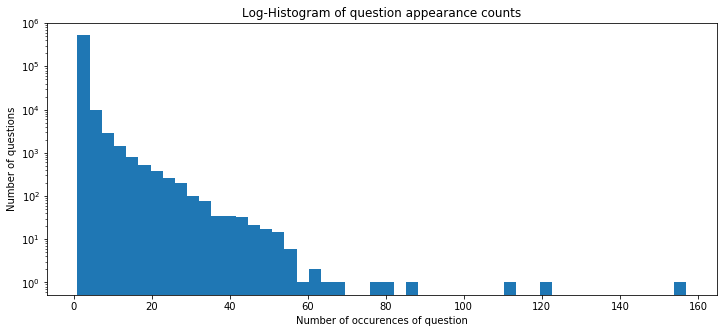

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

위의 Graph를 살펴보면 대부분의 질문들이 몇번만 나타나고 몇몇의 질문들만이 여러번 중복해서 나타난다는 것을 알수 있다.  
맨 오른쪽 부분에 위치한 Data를 보면 같은 질문이 160번이나 나타난 것을 볼수 있고 다른 질문에 비해 이정도는 outlier
라고 여길 수 있다.

Target값의 1을 가지고 있는 것은 약 37% 이다.

In [10]:
from sklearn.metrics import log_loss
p = df_train['is_duplicate'].mean()
p

0.369197853026293

In [11]:
print('Predicted score: ', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

Predicted score:  0.6585273839844354


In [12]:
np.zeros_like(df_train['is_duplicate'])

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
df_train['is_duplicate']

0         0
1         0
2         0
3         0
4         0
5         1
6         0
7         1
8         0
9         0
10        0
11        1
12        1
13        1
14        0
15        1
16        1
17        0
18        1
19        0
20        1
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        1
         ..
404260    0
404261    1
404262    0
404263    0
404264    0
404265    1
404266    0
404267    1
404268    0
404269    0
404270    0
404271    0
404272    1
404273    1
404274    1
404275    0
404276    0
404277    0
404278    0
404279    0
404280    1
404281    1
404282    1
404283    0
404284    1
404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, Length: 404290, dtype: int64

In [14]:
df_test = pd.read_csv(DATA_PATH + 'test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198


우리가 가지고 있는 데이터와 LeaderBoard(LB)가 어느 정도 유사한지 살펴볼 필요가 있다.  
LB에서 평가 방법으로 log-loss를 사용합니다.  
'is_duplicate'의 실제값과 평균값을 log-loss로 계산하는 것을 똑같이 설정하여 우리가 산출한 값과 LB score를 비교해 보자.  
우리의 Predicted score는 0.66, LeaderBoard(LB) score는 0.55이다.  
두개가 많이 다른 이유는 우리의 것과 LB가 가지고 있는 values의 분포가 다르기 때문이다.  

Test Set
=========

In [15]:
df_test = pd.read_csv(DATA_PATH + 'test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [16]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


Row Data 개수는 230만개 정도이다.  
qid 값이 존재 하지 않는다.  
대부분의 질문들은 데이터 양을 늘리기 위해 자동 생성된 질문들이다.  
의미 있는 질문이 존재하는 row들은 매우 적을 수도 있다.  

Text analysis
=============

각 질문의 음절수를 나타내는 Histogram를 그려본다.  
Test Set에는 자동 생성된 질문들이 많기 때문에 대부분의 분석은 Training Set에서 
진행 한다.  

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Probability')

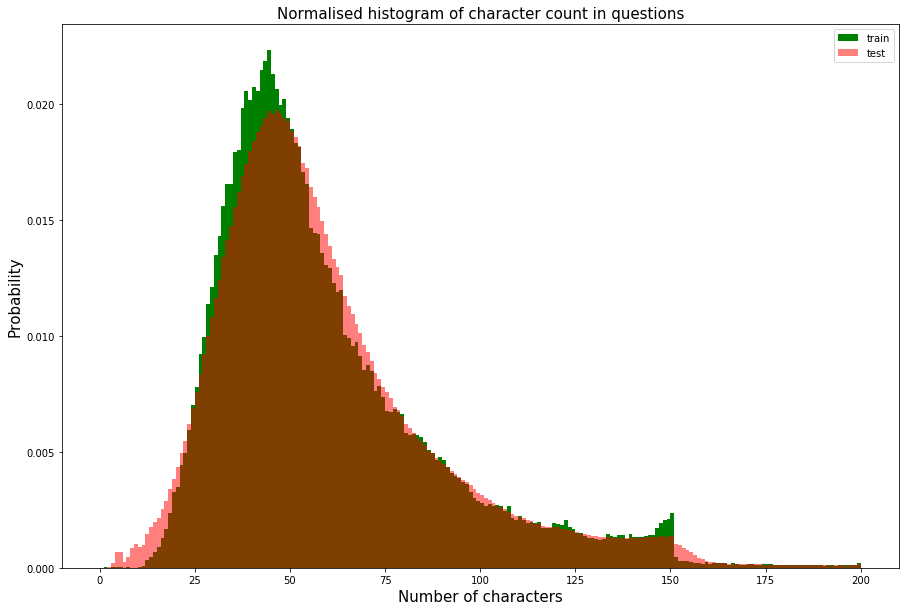

In [17]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0,200], facecolor='g', normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0,200], facecolor='r', normed=True, alpha=0.5, label='test')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [18]:
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(
    dist_train.mean(), dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


character 분포는 15 ~ 150
Train Set 과 Test Set의 분포가 조금 다른것을 볼 수 있으며 , Test Set이 좀더 분포가 부드러운 것을 볼수 있다.  
Train Set은 character 수가 150에서 급격하게 줄어 든다.  
이것은 Quora의 question Size의 제한이 있는건 아닌지 추정 가능 하다.  
이 Graph는 character 개수 제한을 200개로 하였는데 원래 데이터에서는 1200개 까지 허용된다.  
하지만 200개 내외에 대부분의 데이터가 포함되기 때문에 큰 문제는 없어 보인다.  

이번에는 word를 기준으로 distribution plot을 그려보자. word 띄어 쓰기만 사용한다. 

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Prabability')

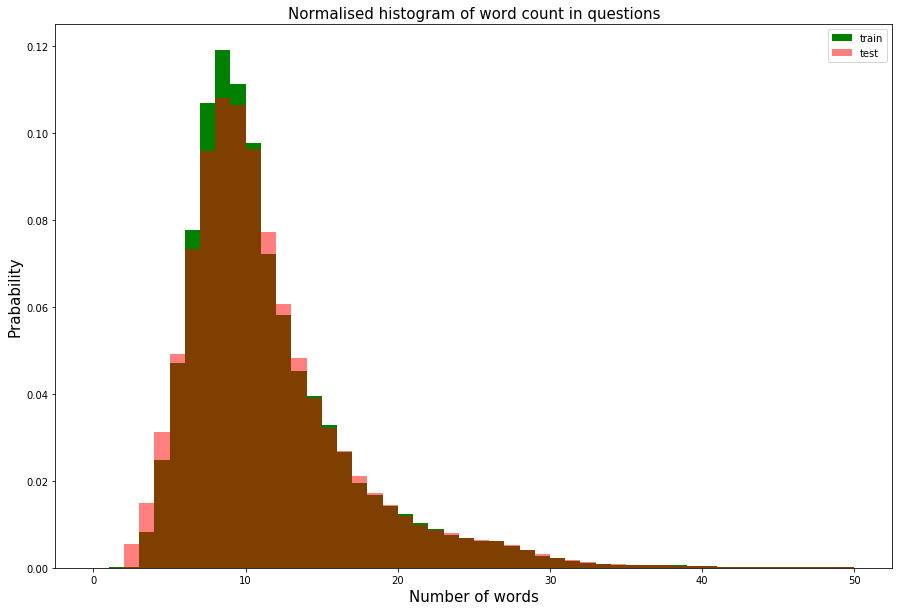

In [19]:
dist_train = train_qs.apply(lambda x:len(x.split(' ')))
dist_test = test_qs.apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], facecolor='g', normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], facecolor='r', normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [20]:
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(
    dist_train.mean(), dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


word의 distribution 와 character의 distribution이 비슷한 분포를 이루고 있다.  
대부분의 word가 10개 내외에 형성 되어 있다.  
word에서도 Test Set의 분포가 부드럽다.  

WordCloud를 통하여 가장 많이 언급된 단어를 표현해 보자.

(-0.5, 1439.5, 1079.5, -0.5)

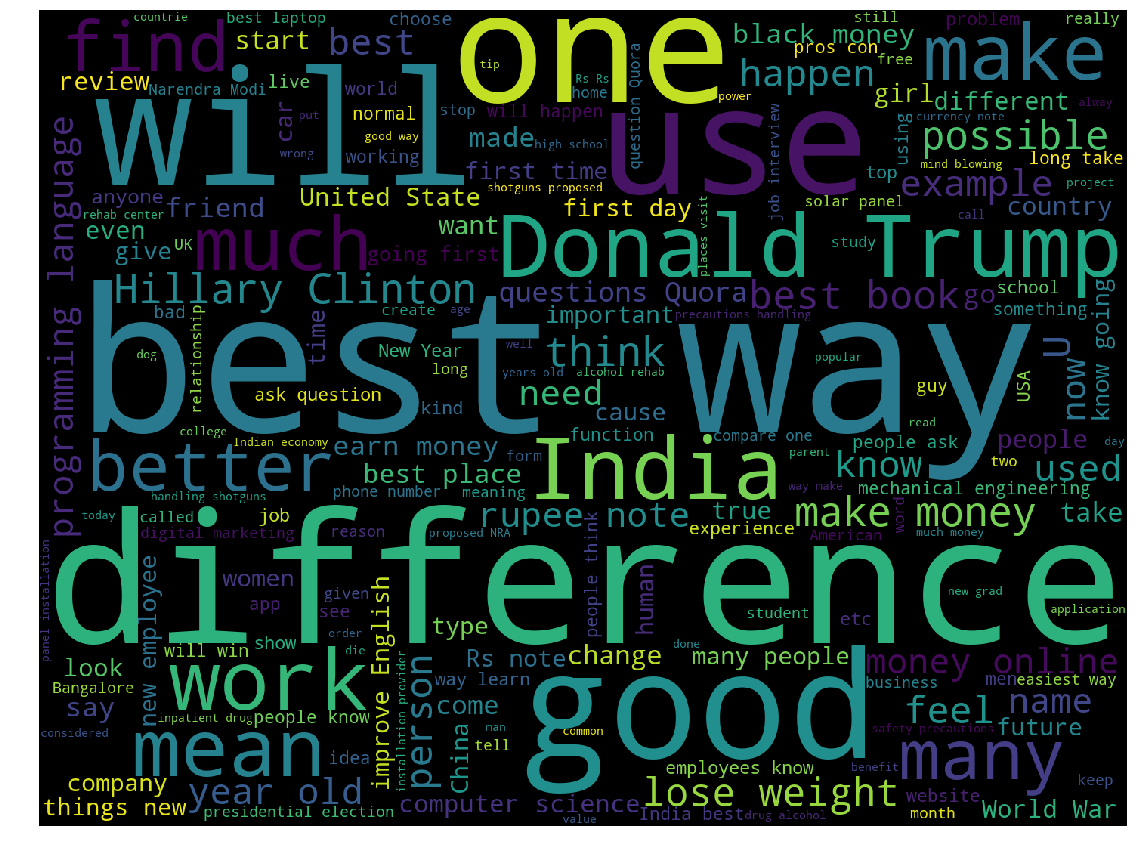

In [21]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

best way, good, difference등의 단어가 질문을 할때 일반적으로 가장 많이 사용된다는 것을 알수 있다.  
특이점은 Donald Trump가 존재 하는 것이다.  

(-0.5, 1439.5, 1079.5, -0.5)

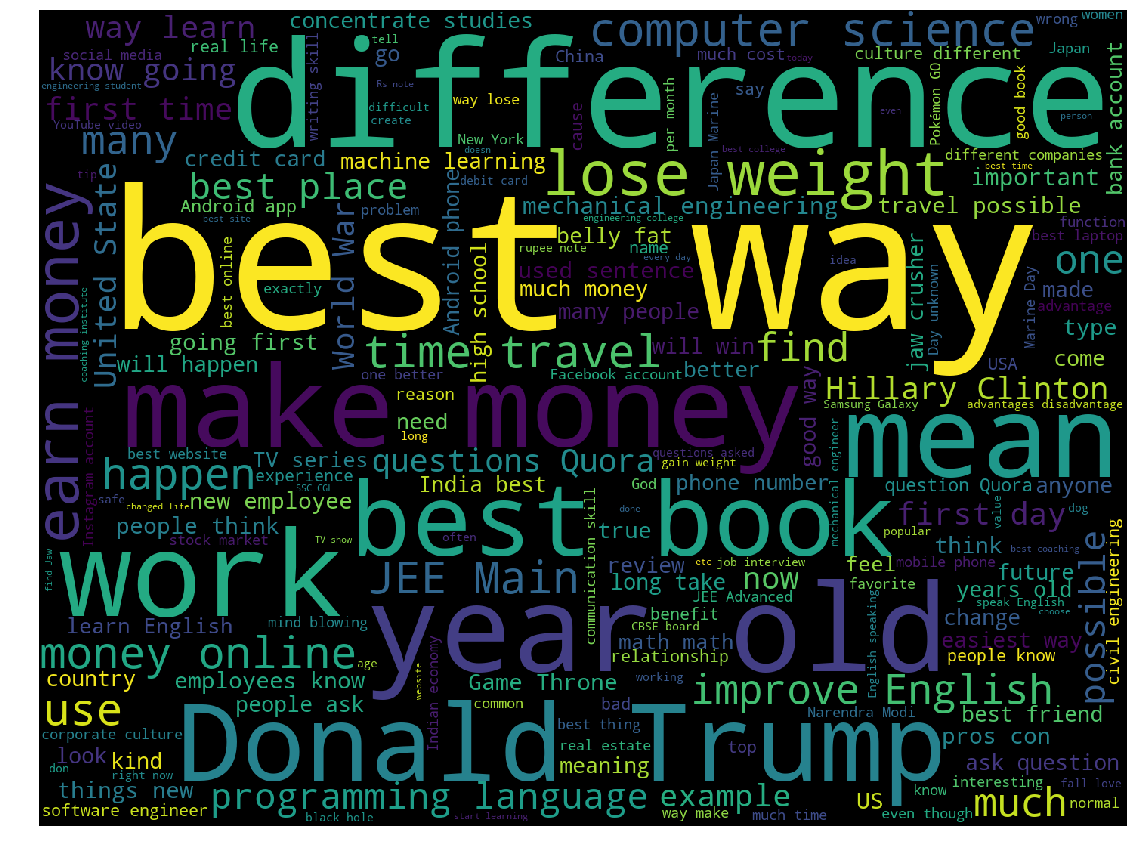

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(test_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

Test도 Train과 비슷한 단어들이 나오고 있다.  
당연할지도 모른다.  
Train Data로 부터 Test Data가 만들어 졌다.  

Semantic Analysis
=================

이제 사람들이 질문을 할때 어떠한 구두점을 사용해서 질문을 하는지 살펴보자.

In [23]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_qs.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_qs.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


Initial Feature Analysis
========================

본격적으로 분류 모델을 만들기 전에 nltk의 stopwords 패키지에 속해 있는 단어를 제외한 단어들이 얼마나 큰 영향력을 가졌는지 살펴보도록 하자.

In [24]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0: # stopword 만 존재
        return 0
    
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2)) / (len(q1words) + len(q2words))
    
    return R

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'word_match_share')

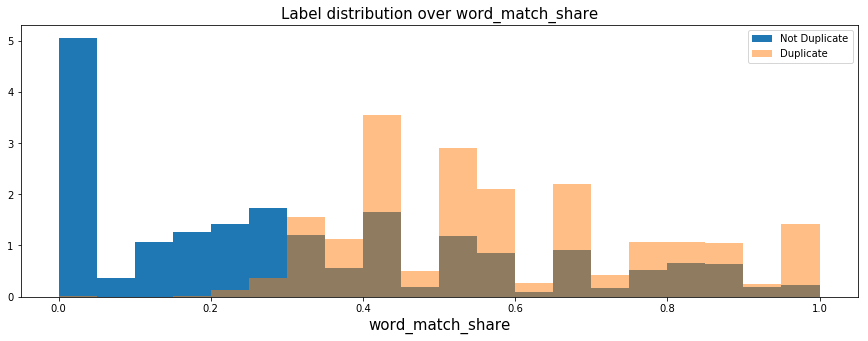

In [25]:
plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.5, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [26]:
train_word_match

0         0.727273
1         0.307692
2         0.363636
3         0.000000
4         0.000000
5         0.470588
6         0.000000
7         0.500000
8         0.500000
9         0.363636
10        0.000000
11        0.571429
12        1.000000
13        0.571429
14        0.818182
15        0.315789
16        0.500000
17        0.000000
18        0.533333
19        0.600000
20        0.571429
21        0.000000
22        0.666667
23        0.000000
24        0.000000
25        0.769231
26        0.400000
27        0.000000
28        0.800000
29        0.500000
            ...   
404260    0.571429
404261    0.600000
404262    0.666667
404263    0.333333
404264    0.266667
404265    0.333333
404266    0.160000
404267    0.800000
404268    0.000000
404269    0.666667
404270    0.400000
404271    0.000000
404272    0.400000
404273    0.533333
404274    0.363636
404275    0.000000
404276    0.000000
404277    0.000000
404278    0.285714
404279    0.307692
404280    0.909091
404281    0.

위의 그래프를 살펴 보면 특정 단어들로 not duplicate와 duplicate를 어느 정도 구분할 수 있을것이라는 것을 알수 있다.  
하지만 두 범주가 겹치는 부분이 어느 정도는 존재하기 때문에 좋은 방법은 아니다.  

TF-IDF
======

이제 TF-IDF 기법을 사용하여 Feature를 발전시켜 본다.  
이 기법은 특정 단어가 나타나는 빈도를 파악하여 단어 마다 특정 가중치를 부여하는 방법이다.  
만약에 다른 질문에서 흔하게 사용되지 않는 단어가 사용되었다면 흔하게 사용되는 단어보다 더 많은 영향력을 가졌을 것이라고 판단하는 것이다.  

In [27]:
from collections import Counter
# 특정 단어가 한번만 나온다면 오타로 이해 하고 무시한다.
# eps는 나타나는 빈도가 너무 적은 단어의 영향력을 높여 주는 역활을 한다.
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

In [28]:
eps = 5000
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [29]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key = lambda x:x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print(sorted(weights.items(), key = lambda x:x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 
[('シ', 9.998000399920016e-05), ('し?', 9.998000399920016e-05), ('19-year-old.', 9.998000399920016e-05), ('1-855-425-3768', 9.998000399920016e-05), ('confederates', 9.998000399920016e-05), ('asahi', 9.998000399920016e-05), ('fab', 9.998000399920016e-05), ('109?', 9.998000399920016e-05), ('samrudi', 9.998000399920016e-05), ('fulfill?', 9.998000399920016e-05)]


In [30]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) 
                    for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'word_match_share')

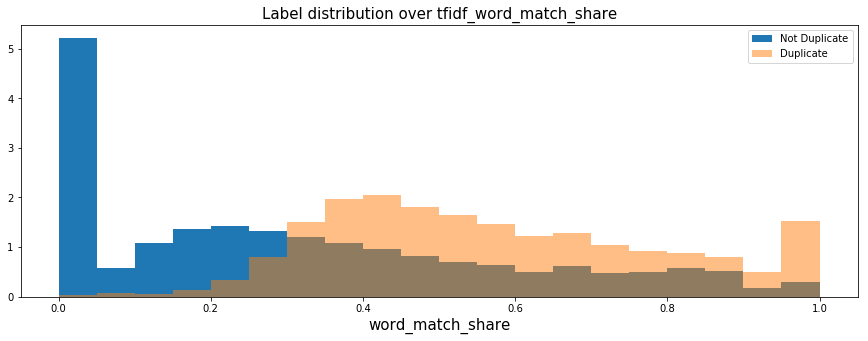

In [31]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.5, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [32]:
from sklearn.metrics import roc_auc_score
print('Original AUC: ', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC: ', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC:  0.7804327049353577
   TFIDF AUC:  0.7704802292218704


AUC는 TFIDF가 오히려 더 낮은 것을 알수 있다.  
두 모델다 Stopwords를 적용하여 예측 하였다.  

Rebalancing the Data
====================

Train Set과 Test Set의 Positive rate가 다르기 때문에 XGBoost가 받을 Data를 Rebalancing하는 과정이 필요하다.  
Training Set의 Positive Rate를 17%로 조정해 주면 XGBoost가 더 좋은 확률 값을 가질수 있다.  

In [33]:
# Trainning, Testing Data 만들기.
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


In [34]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

p = 0.165 # 17%와 관계된 값
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1

In [35]:
neg_train

,word_match,tfidf_word_match
0,0.727273,0.772164
1,0.307692,0.361758
2,0.363636,0.355191
3,0.000000,0.000000
4,0.000000,0.000000
6,0.000000,0.000000
8,0.500000,0.396755
9,0.363636,0.503203
10,0.000000,0.000000
14,0.818182,0.804625


In [36]:
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])

In [37]:
neg_train

,word_match,tfidf_word_match
0,0.727273,0.772164
1,0.307692,0.361758
2,0.363636,0.355191
3,0.000000,0.000000
4,0.000000,0.000000
6,0.000000,0.000000
8,0.500000,0.396755
9,0.363636,0.503203
10,0.000000,0.000000
14,0.818182,0.804625


510054 rows × 2 columns  에서 631223 rows × 2 columns로 더 120000 늘어 났다. 

In [38]:
print(len(pos_train) / (len(pos_train) + len(neg_train)))

0.19124366100096607


In [39]:
from sklearn.cross_validation  import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBoost
=======

이제 data를 가지고 XGBoost에 적용하고 LB score 보자.

In [41]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.686204	valid-logloss:0.686277
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.629598	valid-logloss:0.630323
[20]	train-logloss:0.589613	valid-logloss:0.590855
[30]	train-logloss:0.560349	valid-logloss:0.561982
[40]	train-logloss:0.53843	valid-logloss:0.540373
[50]	train-logloss:0.521747	valid-logloss:0.523946
[60]	train-logloss:0.508881	valid-logloss:0.511295
[70]	train-logloss:0.498839	valid-logloss:0.501409
[80]	train-logloss:0.491027	valid-logloss:0.493732
[90]	train-logloss:0.484955	valid-logloss:0.487784
[100]	train-logloss:0.48009	valid-logloss:0.483024
[110]	train-logloss:0.476249	valid-logloss:0.479273
[120]	train-logloss:0.473187	valid-logloss:0.476285
[130]	train-logloss:0.470736	valid-logloss:0.473903
[140]	train-logloss:0.468736	valid-logloss:0.471964
[150]	train-logloss:0.467138	valid-logloss:0.470407
[160]	train-logloss:0.465826	v

In [ ]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)

<b>kaggle competitions submit -c quora-question-pairs -f submission.csv -m "Message" </b>

![navie](./images/navie_submission_0.55410.png)

![xgb](./images/xgb_submission_0.41951.png)